# HP41418-3


In [1]:
from sdpp import read
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('jacqueline')

In [2]:
path = "/volumes/eos/users/jacqueline/HP41418-3"

In [3]:
ecal_dcside_acstrip_f = "HP41418-3_source_facing_DCside_ACstrip_220707_melinatorcosiupdates.ecal"
ecal_dcside_dcstrip_f = "HP41418-3_source_facing_DCside_DCstrip_220707_melinatorcosiupdates.ecal"

ecal_acside_acstrip_f = "HP41418-3_source_facing_ACside_ACstrip_220707_melinatorcosiupdates.ecal"
ecal_acside_dcstrip_f = "HP41418-3_source_facing_ACside_DCstrip_220707_melinatorcosiupdates.ecal"

# Compare FWHM from energy calibrations

In [4]:
def parse_ecal(ecal_fname):
    f = open(ecal_fname,"r")
    lines = f.readlines()

    energies = []
    fwhm_energy_ls = []
    fwhm_percent_ls = []

    for line in lines:
        line = line.split(' ')

        if line[0] == "CP":
            num_peaks = int(line[6])
            det = int(line[2])

            for peak in range(num_peaks):
                line_adc = float(line[7+3*peak])
                line_energy = float(line[8+3*peak])
                fwhm_adc = 0.0
                fwhm_energy = float(line[9+3*peak])
                fwhm_percent = 100*fwhm_energy/line_energy

                energies.append(line_energy)
                fwhm_energy_ls.append(fwhm_energy)
                fwhm_percent_ls.append(fwhm_percent)

    f.close()
    return energies, fwhm_energy_ls, fwhm_percent_ls

In [5]:
## DC-side illumination

# DC strip
energies_dcside_dcstrip, fwhm_energy_dcside_dcstrip, fwhm_perc_dcside_dcstrip = \
parse_ecal(path + "/ecal/" + ecal_dcside_dcstrip_f)

# AC strip
energies_dcside_acstrip, fwhm_energy_dcside_acstrip, fwhm_perc_dcside_acstrip = \
parse_ecal(path + "/ecal/" + ecal_dcside_acstrip_f)


## AC-side illumination

# DC strip
energies_acside_dcstrip, fwhm_energy_acside_dcstrip, fwhm_perc_acside_dcstrip = \
parse_ecal(path + "/ecal/" + ecal_acside_dcstrip_f)

# AC strip
energies_acside_acstrip, fwhm_energy_acside_acstrip, fwhm_perc_acside_acstrip = \
parse_ecal(path + "/ecal/" + ecal_acside_acstrip_f)

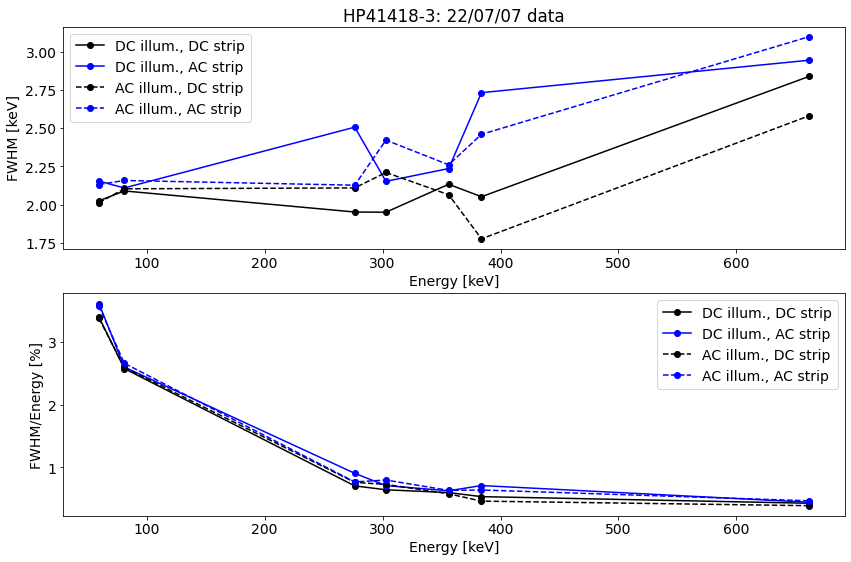

In [6]:
# Plot
plt.figure(figsize=(14,9))

plt.subplot(211)
plt.plot(energies_dcside_dcstrip, fwhm_energy_dcside_dcstrip, "o-", color='k', label="DC illum., DC strip")
plt.plot(energies_dcside_acstrip, fwhm_energy_dcside_acstrip, "o-", color='b', label="DC illum., AC strip")

plt.plot(energies_acside_dcstrip, fwhm_energy_acside_dcstrip, "o--", color='k', label="AC illum., DC strip")
plt.plot(energies_acside_acstrip, fwhm_energy_acside_acstrip, "o--", color='b', label="AC illum., AC strip")

plt.xlabel("Energy [keV]")
plt.ylabel("FWHM [keV]")
plt.legend(loc='best')
plt.xticks()
plt.yticks()
plt.title("HP41418-3: 22/07/07 data")

plt.subplot(212)
plt.plot(energies_dcside_dcstrip, fwhm_perc_dcside_dcstrip, "o-", color='k', label="DC illum., DC strip")
plt.plot(energies_dcside_acstrip, fwhm_perc_dcside_acstrip, "o-", color='b', label="DC illum., AC strip")

plt.plot(energies_acside_dcstrip, fwhm_perc_acside_dcstrip, "o--", color='k', label="AC illum., DC strip")
plt.plot(energies_acside_acstrip, fwhm_perc_acside_acstrip, "o--", color='b', label="AC illum., AC strip")

plt.xlabel("Energy [keV]")
plt.ylabel("FWHM/Energy [%]")
plt.legend(loc='best')
plt.xticks()
plt.yticks();


# Compare AC and DC spectra. 


## Load the data

In [7]:
def prep_array(arr, ch):
    """Take numpy array from sdpp.read and add a column to it
    which holds the channel number."""
    
    dt = [('channel','i4'),('amplitude','f8'),('time','u8')]
    a = np.zeros(arr.shape,dtype=dt)
    a['amplitude'] = arr['amplitude']
    a['time'] = arr['time']
    a['channel'] = ch
    return a

### Am-241

In [8]:
## DC-side illumination

# DC strip
path_Am241_dcside_dcstrip = path + "/data/crrc6.Ez0Q.dat"
data_Am241_dcside_dcstrip, metadata_Am241_dcside_dcstrip = read(path_Am241_dcside_dcstrip)

data_Am241_dcside_dcstrip = prep_array(data_Am241_dcside_dcstrip, 0)


# AC strip
path_Am241_dcside_acstrip = path + "/data/crrc6.I7pb.dat"
data_Am241_dcside_acstrip, metadata_Am241_dcside_acstrip = read(path_Am241_dcside_acstrip)

data_Am241_dcside_acstrip = prep_array(data_Am241_dcside_acstrip, 0)


## AC-side illumination

# DC strip
path_Am241_acside_dcstrip = path + "/data/crrc6.fG6a.dat"
data_Am241_acside_dcstrip, metadata_Am241_acside_dcstrip = read(path_Am241_acside_dcstrip)

data_Am241_acside_dcstrip = prep_array(data_Am241_acside_dcstrip, 0)


# AC strip
path_Am241_acside_acstrip = path + "/data/crrc6.YlK1.dat"
data_Am241_acside_acstrip, metadata_Am241_acside_acstrip = read(path_Am241_acside_acstrip)

data_Am241_acside_acstrip = prep_array(data_Am241_acside_acstrip, 0)

format identifier: 0x7c2b9a9f
{'format_id': 2083232415, 'raw_npoints': 1024, 'bit_depth': 15, 'shaper_npoints': 32, 'timestep': 32.0, 'vertical': 3.0518509475997192e-06, 'offset': 0.0, 'rcpole': 0.9809825673534073, 'crzero': 0.9999360020479344, 'hpfpole': 0.9999798940091446, 'gain': -6.182320465534298}
format identifier: 0x7c2b9a9f
{'format_id': 2083232415, 'raw_npoints': 1024, 'bit_depth': 15, 'shaper_npoints': 32, 'timestep': 32.0, 'vertical': 3.0518509475997192e-06, 'offset': 0.0, 'rcpole': 0.9809825673534073, 'crzero': 0.9999360020479344, 'hpfpole': 0.9999798940091446, 'gain': 6.182320465534298}
format identifier: 0x7c2b9a9f
{'format_id': 2083232415, 'raw_npoints': 1024, 'bit_depth': 15, 'shaper_npoints': 32, 'timestep': 32.0, 'vertical': 3.0518509475997192e-06, 'offset': 0.0, 'rcpole': 0.9809825673534073, 'crzero': 0.9999360020479344, 'hpfpole': 0.9999798940091446, 'gain': -6.182320465534298}
format identifier: 0x7c2b9a9f
{'format_id': 2083232415, 'raw_npoints': 1024, 'bit_depth':

### Cs-137

In [9]:
## DC-side illumination

# DC strip
path_Cs137_dcside_dcstrip = path + "/data/crrc6.lr5P.dat"
data_Cs137_dcside_dcstrip, metadata_Cs137_dcside_dcstrip = read(path_Cs137_dcside_dcstrip)

data_Cs137_dcside_dcstrip = prep_array(data_Cs137_dcside_dcstrip, 0)


# AC strip
path_Cs137_dcside_acstrip = path + "/data/crrc6.s4Yx.dat"
data_Cs137_dcside_acstrip, metadata_Cs137_dcside_acstrip = read(path_Cs137_dcside_acstrip)

data_Cs137_dcside_acstrip = prep_array(data_Cs137_dcside_acstrip, 0)


## AC-side illumination

# DC strip
path_Cs137_acside_dcstrip = path + "/data/crrc6.dzDa.dat"
data_Cs137_acside_dcstrip, metadata_Cs137_acside_dcstrip = read(path_Cs137_acside_dcstrip)

data_Cs137_acside_dcstrip = prep_array(data_Cs137_acside_dcstrip, 0)


# AC strip
path_Cs137_acside_acstrip = path + "/data/crrc6.xC6b.dat"
data_Cs137_acside_acstrip, metadata_Cs137_acside_acstrip = read(path_Cs137_acside_acstrip)

data_Cs137_acside_acstrip = prep_array(data_Cs137_acside_acstrip, 0)

format identifier: 0x7c2b9a9f
{'format_id': 2083232415, 'raw_npoints': 1024, 'bit_depth': 15, 'shaper_npoints': 32, 'timestep': 32.0, 'vertical': 3.0518509475997192e-06, 'offset': 0.0, 'rcpole': 0.9809825673534073, 'crzero': 0.9999360020479344, 'hpfpole': 0.9999798940091446, 'gain': -6.182320465534298}
format identifier: 0x7c2b9a9f
{'format_id': 2083232415, 'raw_npoints': 1024, 'bit_depth': 15, 'shaper_npoints': 32, 'timestep': 32.0, 'vertical': 3.0518509475997192e-06, 'offset': 0.0, 'rcpole': 0.9809825673534073, 'crzero': 0.9999360020479344, 'hpfpole': 0.9999798940091446, 'gain': 6.182320465534298}
format identifier: 0x7c2b9a9f
{'format_id': 2083232415, 'raw_npoints': 1024, 'bit_depth': 15, 'shaper_npoints': 32, 'timestep': 32.0, 'vertical': 3.0518509475997192e-06, 'offset': 0.0, 'rcpole': 0.9809825673534073, 'crzero': 0.9999360020479344, 'hpfpole': 0.9999798940091446, 'gain': -6.182320465534298}
format identifier: 0x7c2b9a9f
{'format_id': 2083232415, 'raw_npoints': 1024, 'bit_depth':

## Apply energy calibration

In [10]:
# Read the ecal parameters from melinator
def read_ecal(ecal):
    path = "/volumes/eos/users/jacqueline/HP41418-3/ecal/"
    fit_params = []
    
    for line in open(path + ecal, "r").readlines():
        if line.startswith("CM"):
            fit_params.append(float(line.split()[6]))
            fit_params.append(float(line.split()[7]))
            
    return fit_params


# Convert amplitudes to energy in keV
def amp_to_keV(events, ecal):
    energies = []

    for ADC in events:

        ch_energies = ecal[0] + ecal[1]*ADC

        energies.append(ch_energies)

    return np.array(energies)

In [11]:
# Read the ecal parameters from melinator

print('DC-side illumination:')
ecal_dcside_acstrip = read_ecal(ecal_dcside_acstrip_f)
ecal_dcside_dcstrip = read_ecal(ecal_dcside_dcstrip_f)

print(f'AC strip ecal: energy = {ecal_dcside_acstrip[0]} + {ecal_dcside_acstrip[1]}*ADC')
print(f'DC strip ecal: energy = {ecal_dcside_dcstrip[0]} + {ecal_dcside_dcstrip[1]}*ADC')


print('\nAC-side illumination:')
ecal_acside_acstrip = read_ecal(ecal_acside_acstrip_f)
ecal_acside_dcstrip = read_ecal(ecal_acside_dcstrip_f)

print(f'AC strip ecal: energy = {ecal_acside_acstrip[0]} + {ecal_acside_acstrip[1]}*ADC')
print(f'DC strip ecal: energy = {ecal_acside_dcstrip[0]} + {ecal_acside_dcstrip[1]}*ADC')

DC-side illumination:
AC strip ecal: energy = -0.0281613 + 0.0342378*ADC
DC strip ecal: energy = -0.0775269 + 0.0337866*ADC

AC-side illumination:
AC strip ecal: energy = -0.167553 + 0.0342407*ADC
DC strip ecal: energy = -0.0308556 + 0.0337929*ADC


In [12]:
# Convert amplitudes to energy in keV
energies_Am241_dcside_dcstrip = amp_to_keV(data_Am241_dcside_dcstrip['amplitude'], ecal_dcside_dcstrip)
energies_Am241_dcside_acstrip = amp_to_keV(data_Am241_dcside_acstrip['amplitude'], ecal_dcside_acstrip)

energies_Am241_acside_dcstrip = amp_to_keV(data_Am241_acside_dcstrip['amplitude'], ecal_acside_dcstrip)
energies_Am241_acside_acstrip = amp_to_keV(data_Am241_acside_acstrip['amplitude'], ecal_acside_acstrip)

In [13]:
# Convert amplitudes to energy in keV
energies_Cs137_dcside_dcstrip = amp_to_keV(data_Cs137_dcside_dcstrip['amplitude'], ecal_dcside_dcstrip)
energies_Cs137_dcside_acstrip = amp_to_keV(data_Cs137_dcside_acstrip['amplitude'], ecal_dcside_acstrip)

energies_Cs137_acside_dcstrip = amp_to_keV(data_Cs137_acside_dcstrip['amplitude'], ecal_acside_dcstrip)
energies_Cs137_acside_acstrip = amp_to_keV(data_Cs137_acside_acstrip['amplitude'], ecal_acside_acstrip)

# 1. DC side illumination: Compare AC and DC strip spectra 

## Pulse-height spectrum

In [14]:
#%matplotlib notebook
# plt.hist(data_Am241_dcside_dcstrip['amplitude'], bins=9000, histtype="step", label="DC strip", density=True)
# plt.hist(data_Am241_dcside_acstrip['amplitude'], bins=9000, histtype="step", label="AC strip", density=True)
# plt.legend()
# plt.yscale('log')
# plt.ylabel('cnts')
# plt.xlabel('pulse-height')
# plt.xlim(0,3000)
# plt.title(r"$^{241}\mathrm{Am}$, DC-side illumination");

## Energy spectrum

Text(0.5, 1.0, '$^{241}\\mathrm{Am}$, DC-side illumination')

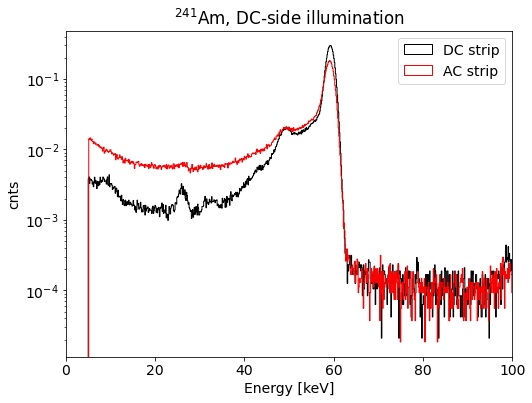

In [15]:
#%matplotlib notebook
plt.hist(energies_Am241_dcside_dcstrip, bins=9000, histtype="step", label="DC strip", density=True)
plt.hist(energies_Am241_dcside_acstrip, bins=9000, histtype="step", label="AC strip", density=True)
plt.legend()
plt.yscale('log')
plt.ylabel('cnts')
plt.xlabel('Energy [keV]')
plt.xlim(0, 100)
plt.title(r"$^{241}\mathrm{Am}$, DC-side illumination")

# 2. AC-side illumination: compare AC and DC strip spectra

Text(0.5, 1.0, '$^{241}\\mathrm{Am}$, AC-side illumination')

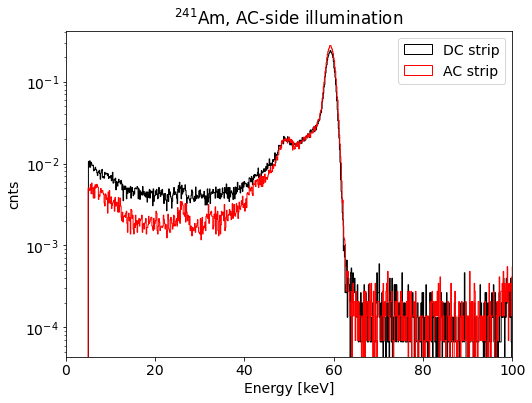

In [30]:
#%matplotlib notebook
plt.hist(energies_Am241_acside_dcstrip, bins=9000, histtype="step", label="DC strip", density=True)
plt.hist(energies_Am241_acside_acstrip, bins=9000, histtype="step", label="AC strip", density=True)
plt.legend()
plt.yscale('log')
plt.ylabel('cnts')
plt.xlabel('Energy [keV]')
plt.xlim(0, 100)
plt.title(r"$^{241}\mathrm{Am}$, AC-side illumination")

# 3. Overplot the spectral lines from the AC and DC side runs

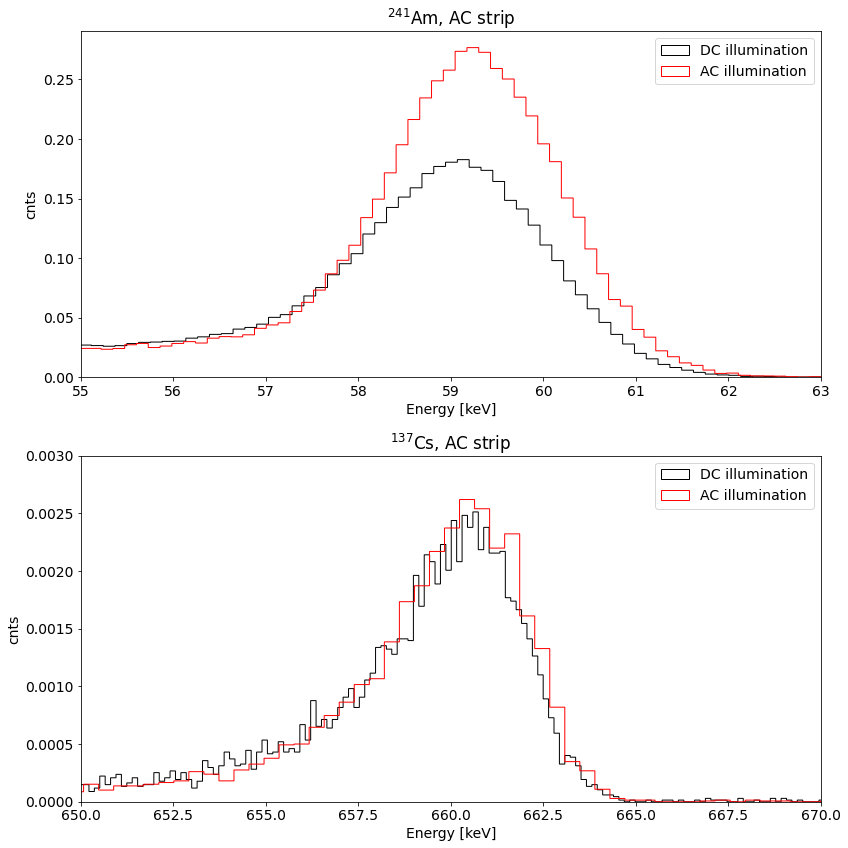

In [46]:
#%matplotlib notebook
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.hist(energies_Am241_dcside_acstrip, bins=9000, histtype="step", label="DC illumination", density=True)
plt.hist(energies_Am241_acside_acstrip, bins=9000, histtype="step", label="AC illumination", density=True)
plt.legend()
#plt.yscale('log')
plt.ylabel('cnts')
plt.xlabel('Energy [keV]')
plt.xlim(55, 63)
plt.title(r"$^{241}\mathrm{Am}$, AC strip")

plt.subplot(212)
plt.hist(energies_Cs137_dcside_acstrip, bins=9000, histtype="step", label="DC illumination", density=True)
plt.hist(energies_Cs137_acside_acstrip, bins=3000, histtype="step", label="AC illumination", density=True)
plt.legend()
#plt.yscale('log')
plt.ylabel('cnts')
plt.xlabel('Energy [keV]')
plt.xlim(650, 670)
plt.ylim(0,0.003)
plt.title(r"$^{137}\mathrm{Cs}$, AC strip")

plt.tight_layout()

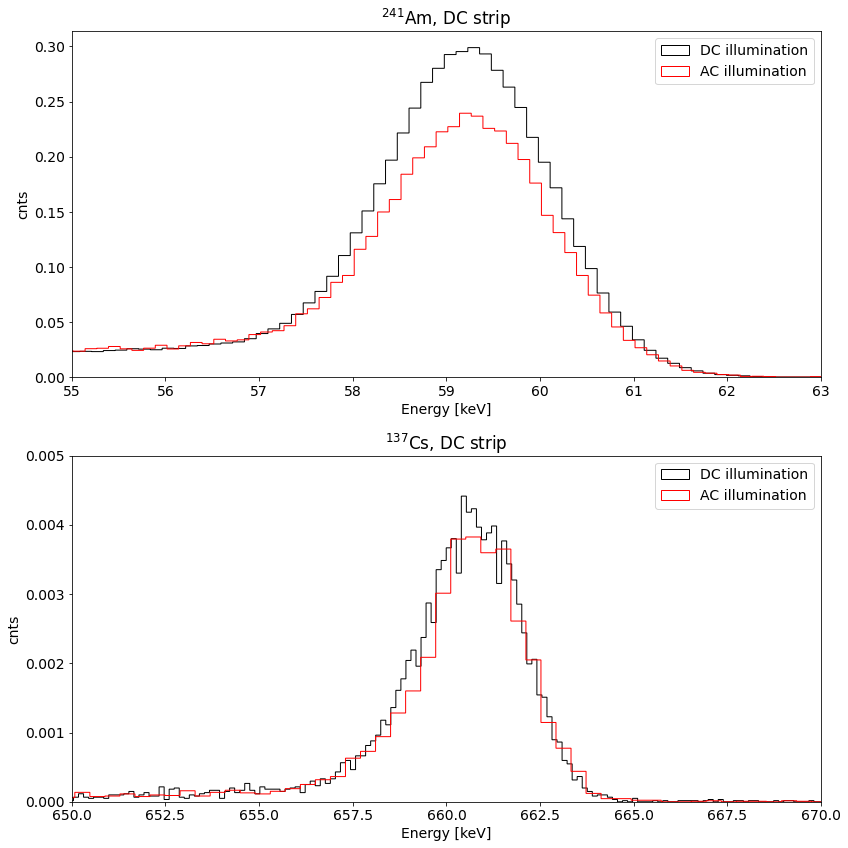

In [48]:
#%matplotlib notebook
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.hist(energies_Am241_dcside_dcstrip, bins=9000, histtype="step", label="DC illumination", density=True)
plt.hist(energies_Am241_acside_dcstrip, bins=9000, histtype="step", label="AC illumination", density=True)
plt.legend()
#plt.yscale('log')
plt.ylabel('cnts')
plt.xlabel('Energy [keV]')
plt.xlim(55, 63)
plt.title(r"$^{241}\mathrm{Am}$, DC strip")

plt.subplot(212)
plt.hist(energies_Cs137_dcside_dcstrip, bins=9000, histtype="step", label="DC illumination", density=True)
plt.hist(energies_Cs137_acside_dcstrip, bins=3000, histtype="step", label="AC illumination", density=True)
plt.legend()
#plt.yscale('log')
plt.ylabel('cnts')
plt.xlabel('Energy [keV]')
plt.xlim(650, 670)
plt.ylim(0, 0.005)
plt.title(r"$^{137}\mathrm{Cs}$, DC strip")

plt.tight_layout()